## Bilbiotecas

In [ ]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Geração do dataset

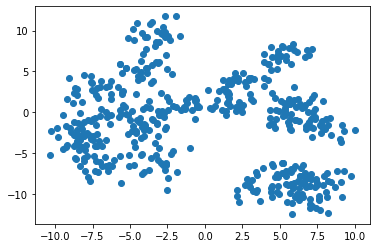

In [ ]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

## Função de cálculo do número de clusters

In [ ]:
# Calcula qual a melhor quantidade de grupos para o K-Means
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

## Cálculo do melhor número de clusters

In [ ]:
# Cria objeto K-Means para quantidades de grupos de 1 a 20
# Aplica função fit para separar o dataset X na quantidade de grupos calculada

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

wcss

[31547.372471390485,
 16949.214472147927,
 9464.847250570496,
 6005.101775346179,
 4717.404091931214,
 3662.6403286096665,
 2976.0038976067435,
 2503.582476614416,
 2050.3493413951846,
 1841.677406971037,
 1668.8059184429553,
 1512.2992308564048,
 1333.2929825019392,
 1237.8203438714036,
 1060.247956703483,
 998.0140950188547,
 909.0438041345568,
 843.1423753427741,
 813.3363192891945]

In [ ]:
# Função optimal_number_of_clusters() indica qual a melhor quantidade de grupos para o K-means dentro do intervalo de 1 a 20 grupos.
n = optimal_number_of_clusters(wcss)
print(n)

4


##Visualização dos centróides

Number of cluster:  4


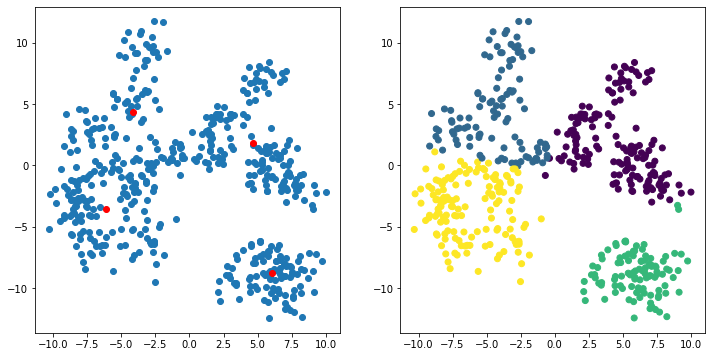


Number of cluster:  5


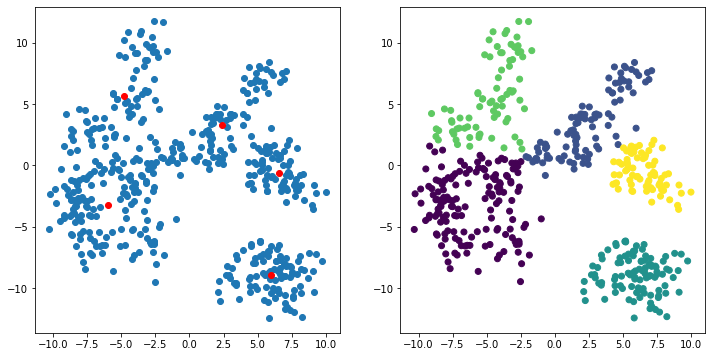


Number of cluster:  6


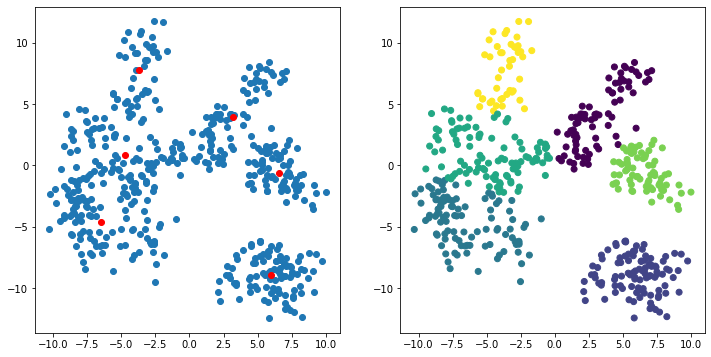


Number of cluster:  7


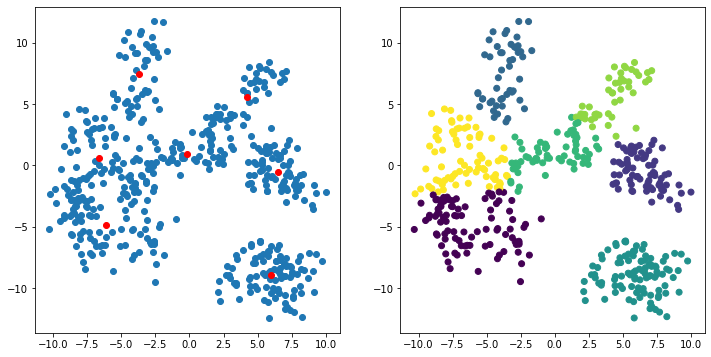


Number of cluster:  8


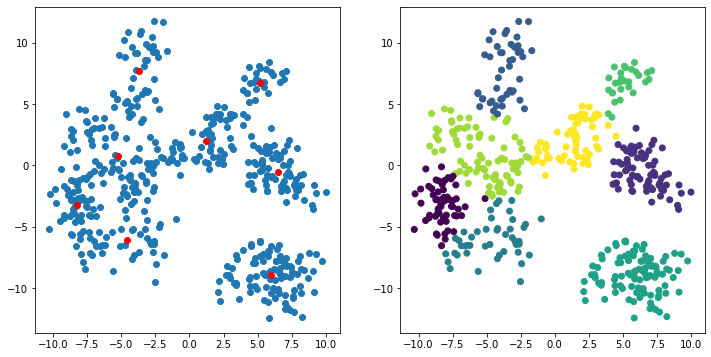


Number of cluster:  9


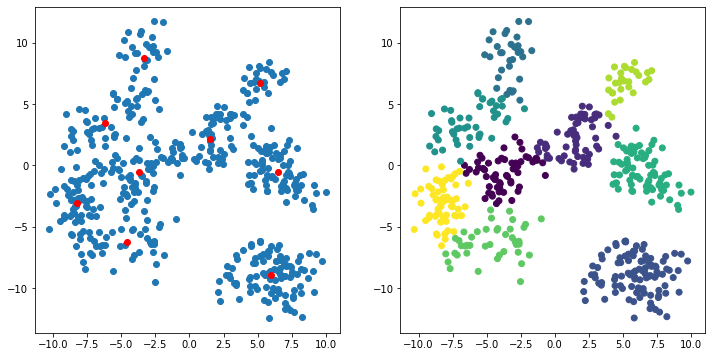


Number of cluster:  10


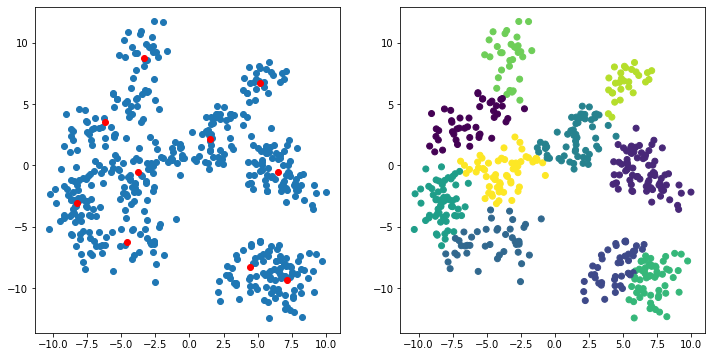


Number of cluster:  11


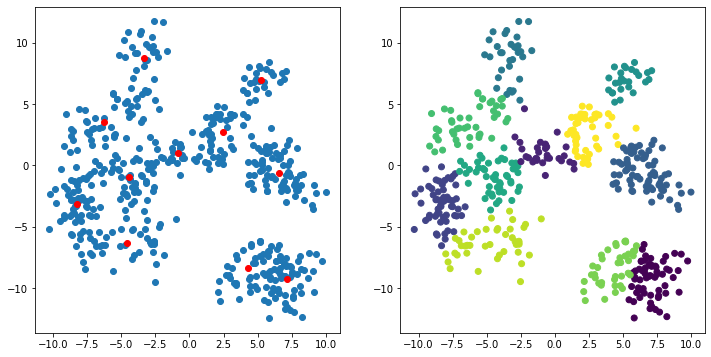

In [47]:
for i in range(4,12):
    print("Number of cluster: ", i)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    pred_y = kmeans.fit_predict(X)

    # Print dos pontos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Print dos centroides
    ax1.scatter(X[:,0], X[:,1])
    ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')

    # Grupos com cores
    ax2.scatter(X[:,0], X[:,1], c=pred_y)

    plt.show()
    print('')

## Visulização da curva de WCSS

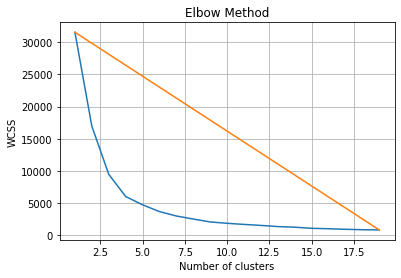

In [48]:
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()